## MNIST Simple Neural Network

The following notebook outlines a simple pipeline for building and assessing the prediction of a simple Neural network with just 1 hidden and 1 output layer.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.evaluate import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import auc, roc_auc_score, roc_curve
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD

import tensorflow as tf
print("Using Tensorflow version :", tf.__version__)

import warnings
warnings.filterwarnings("ignore")

Using Tensorflow version : 2.3.1


In [2]:
# import the necessary packages
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


class Simplenn:
    @staticmethod
    def build(input_shape, n_classes, n_layers, activation_type):
        # define the architecture using Keras
        model = Sequential()
        first = True
        for i in range(len(n_layers)):
            if first:
                model.add(Dense(n_layers[i], input_shape=input_shape, activation=activation_type['input']))
                first = False
            else:
                model.add(Dense(n_layers[i], activation=activation_type['hidden']))

        model.add(Dense(n_classes, activation=activation_type['output']))

        # return the constructed network architecture
        return model


In [3]:
print("[INFO] Reading MNIST...")
((train_images, train_labels), (testX, testY)) = mnist.load_data()


[INFO] Reading MNIST...


Text(0.5, 1.0, 'Label distribution on training dataset')

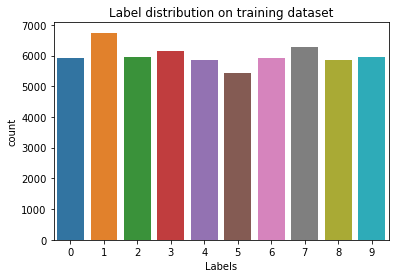

In [4]:
#checking if this is a balanced dataset - training
df_labels = pd.DataFrame(zip(train_images,train_labels), columns=['Pixels','Labels'])
sns.countplot(x="Labels", data=df_labels)
plt.title("Label distribution on training dataset")

Text(0.5, 1.0, 'Label distribution on test dataset')

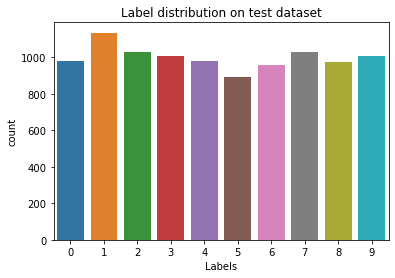

In [5]:
#checking if the test dataset is balanced

df_labels = pd.DataFrame(zip(testX, testY), columns=['Pixels','Labels'])
sns.countplot(x="Labels", data=df_labels)
plt.title("Label distribution on test dataset")

In [6]:
class_types = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

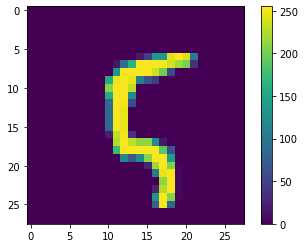

In [7]:
# display one of the images idx=100
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# scale data to the range of [0, 1]
train_images = train_images.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [9]:
# sample out validation data from trainX
(trainX, valX, trainY, valY) = train_test_split(train_images, train_labels,
                                                test_size=0.2, stratify=train_labels, random_state=42)

In [10]:
print("[INFO] : Shapes of the raw data ")
print("=====> Train Data            ", trainX.shape, trainY.shape)
print("=====> Validation Data       ", valX.shape, valY.shape)
print("=====> Test Data             ", testX.shape, testY.shape)

[INFO] : Shapes of the raw data 
=====> Train Data             (48000, 28, 28) (48000,)
=====> Validation Data        (12000, 28, 28) (12000,)
=====> Test Data              (10000, 28, 28) (10000,)


In [11]:
# if we are using a simple neural network then we need to
# flatten the data to 28 * 28 * 1
# for the convolutional neural network RGB normalization is enough
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
valX = valX.reshape((valX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

In [12]:
print("[INFO] : Shapes of the data after reshaping")
print("=====> Train Data            ", trainX.shape, trainY.shape)
print("=====> Validation Data       ", valX.shape, valY.shape)
print("=====> Test Data             ", testX.shape, testY.shape)

[INFO] : Shapes of the data after reshaping
=====> Train Data             (48000, 784) (48000,)
=====> Validation Data        (12000, 784) (12000,)
=====> Test Data              (10000, 784) (10000,)


In [13]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
valY = lb.transform(valY)
testY = lb.transform(testY)

In [14]:
print("[INFO] : Shapes of the data after binarizer")
print("=====> Train Data            ", trainX.shape, trainY.shape)
print("=====> Validation Data       ", valX.shape, valY.shape)
print("=====> Test Data             ", testX.shape, testY.shape)

[INFO] : Shapes of the data after binarizer
=====> Train Data             (48000, 784) (48000, 10)
=====> Validation Data        (12000, 784) (12000, 10)
=====> Test Data              (10000, 784) (10000, 10)


In [15]:
input_shape = (trainX.shape[1], )
print("Input shape", input_shape)
n_classes = 10
#n_layers = [784, 256, 128, 64, 32]
n_layers = [8]
#activation_type = {"input": "relu", "hidden": "relu", "output": "softmax"}
activation_type = {"input": "sigmoid", "hidden": "sigmoid", "output": "softmax"}
learning_rate = 0.01
n_epochs = 5

Input shape (784,)


In [16]:
print("[INFO] building and training network...")

opt = SGD(learning_rate)
model = Simplenn.build(input_shape, n_classes, n_layers, activation_type)
model.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(valX, valY),
              epochs=n_epochs, batch_size=128)


[INFO] building and training network...
Epoch 1/5
375/375 [==============================] - 0s 1ms/step - loss: 2.2382 - accuracy: 0.2141 - val_loss: 2.1461 - val_accuracy: 0.3320
Epoch 2/5
375/375 [==============================] - 0s 855us/step - loss: 2.0668 - accuracy: 0.4267 - val_loss: 1.9973 - val_accuracy: 0.5009
Epoch 3/5
375/375 [==============================] - 0s 956us/step - loss: 1.9264 - accuracy: 0.5420 - val_loss: 1.8635 - val_accuracy: 0.5716
Epoch 4/5
375/375 [==============================] - 0s 890us/step - loss: 1.7961 - accuracy: 0.6041 - val_loss: 1.7359 - val_accuracy: 0.6313
Epoch 5/5
375/375 [==============================] - 0s 865us/step - loss: 1.6712 - accuracy: 0.6562 - val_loss: 1.6135 - val_accuracy: 0.6697


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


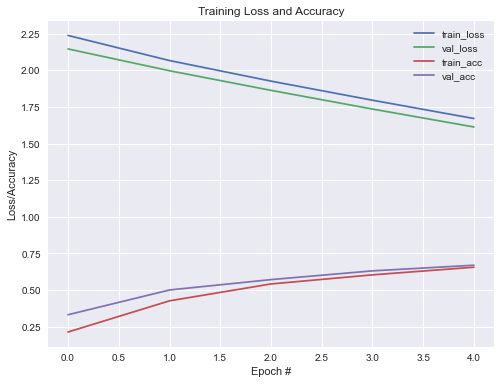

In [18]:
# plot the training loss and accuracy
plt.style.use("seaborn")
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, n_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


In [19]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)

cr = classification_report(testY.argmax(axis=1),
                           predictions.argmax(axis=1),
                           target_names=[str(x) for x in lb.classes_])
print(cr)


[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.74      0.93      0.83       980
           1       0.60      0.99      0.75      1135
           2       0.75      0.77      0.76      1032
           3       0.80      0.58      0.67      1010
           4       0.83      0.25      0.39       982
           5       0.85      0.36      0.51       892
           6       0.78      0.93      0.85       958
           7       0.59      0.91      0.72      1028
           8       0.85      0.49      0.62       974
           9       0.51      0.59      0.55      1009

    accuracy                           0.69     10000
   macro avg       0.73      0.68      0.66     10000
weighted avg       0.73      0.69      0.67     10000



In [21]:
print(roc_auc_score(testY, predictions, multi_class='ovr'))                          

0.9514298492705537


In [22]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testY[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [23]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(testY.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print(roc_auc)

{0: 0.9917689714466718, 1: 0.9945703417140613, 2: 0.9474523758894674, 3: 0.9279737662309057, 4: 0.9453303169628157, 5: 0.9008119555862779, 6: 0.98504589346215, 7: 0.969259312586846, 8: 0.9218844624541196, 9: 0.9302010963722228, 'micro': 0.941605875}


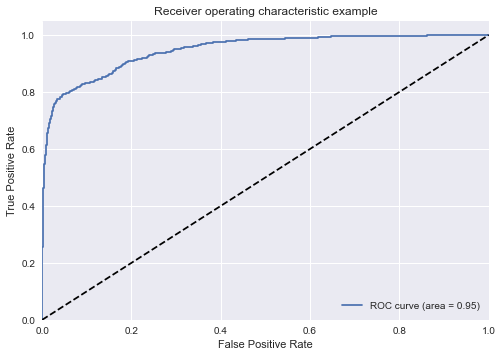

In [24]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

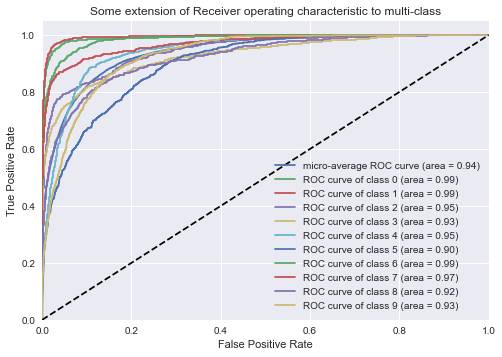

In [25]:
# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

<Figure size 1008x720 with 0 Axes>

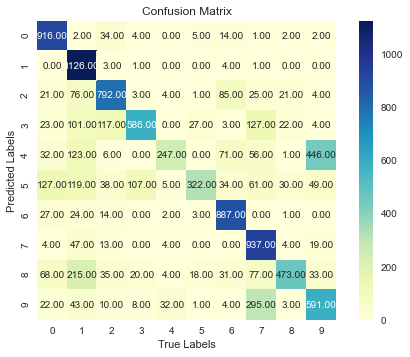

In [26]:
cm = confusion_matrix(y_target=testY.argmax(axis=1),
                      y_predicted=predictions.argmax(axis=1),
                      binary=False)
plt.figure(figsize=(14, 10))
fig, ax = plt.subplots(1)
p = sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='.2f', square=True, ax=ax)
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

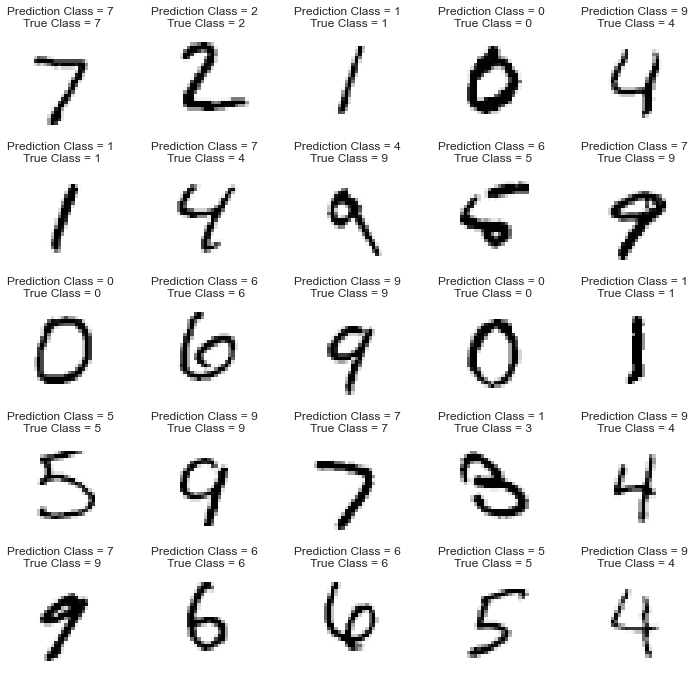

In [27]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(testX[i].reshape(28, 28))
    pred_class = class_types[predictions.argmax(axis=1)[i]]
    true_class = class_types[testY.argmax(axis=1)[i]]
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(pred_class, true_class))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

### Printing some instances where the model didn't predict correctly


In [37]:
pred_class = predictions.argmax(axis=1)
true_class = testY.argmax(axis=1)

incorrect_idx = np.where(pred_class != true_class)

print(incorrect_idx)
incorrect_samples = pred_class[pred_class != true_class][:20]
true_samples_for_incorrect = true_class[pred_class != true_class][:20]

incorrect_samples, true_samples_for_incorrect


(array([   4,    6,    7, ..., 9987, 9988, 9998]),)


(array([9, 7, 4, 6, 7, 1, 9, 7, 9, 9, 7, 6, 9, 1, 6, 9, 9, 0, 9, 1]),
 array([4, 4, 9, 5, 9, 3, 4, 9, 4, 4, 3, 4, 4, 3, 2, 4, 4, 5, 4, 5]))

## **Key Comments**
1. The MNIST dataset is a balanced dataset which means that we don't need to perform Sampling. A hold out validation set was used for validation in this case.
2. As required a simple neural network has been used for baseline purpose
3. Model produced an AUC score of **0.9514298492705537** which is a very good for a baseline.
4. The average accuracy was **73%** and an F1-score of **69%**.
5. Upon further analysis of the results, we can see that the model has difficulty in predicting certains labels such as 4, 7, 9 etc.
